In [1]:
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path

import dill # to load pickle files
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams

ROOT_DIR = "multitask-context-dependent-behavior"

# Inspect configuration

print("Active conda environment:")
os.system("echo $CONDA_PREFIX")

print("Current working directory:")
current_path = os.getcwd()
print(current_path)

print("Root directory:")
head, sep, tail = current_path.partition(ROOT_DIR) # split based on root directory
if sep:
    ROOT_PATH = os.path.join(head, sep)
else:
    raise ValueError(f"Directory '{ROOT_DIR}' not found in current working path.")
print(ROOT_PATH)

print("Data directory:")
DATA_DIR = Path(os.path.join(ROOT_PATH, "data"))
print(DATA_DIR)


Active conda environment:
/Users/eresther/miniconda3/envs/mtcdb
Current working directory:
/Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/notebooks/tests
Root directory:
/Users/eresther/Documents/work/projects/multitask-context-dependent-behavior
Data directory:
/Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/data


# Load Data

## Spiking Times

In [2]:
# Load spikes in pickle format

path_spikes = DATA_DIR / "spikes.pkl"

with open(path_spikes, "rb") as file:
    spikes = dill.load(file)
print(f"Loaded spikes data at: {path_spikes}")
print(f"Type of spikes data: {type(spikes)}")

Loaded spikes data at: /Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/data/spikes.pkl
Type of spikes data: <class 'dict'>


In [3]:
units = list(spikes.keys())
print(f"Number of units: {len(units)}")
print(f"Units IDs: {units[:5]}") # first 5 units

unit_id = "was003a-b1"
unit_data = spikes[unit_id]
unit_sessions = list(unit_data.keys())
print(f"Unit ID: {unit_id}")
print(f"Unit's sessions: {unit_sessions}") # sessions ids
print(f"Number of sessions: {len(unit_sessions)}")

session_id = unit_sessions[0]
session_data = unit_data[session_id]
print(f"Session ID: {session_id}")
print(f"Type of session content: {type(session_data)}") # numpy array
print(f"Shape of session data: {session_data.shape}") # (2, n_spikes)

print(f"Trial indices (1st row): {session_data[0]}") # trial indices
print(f"Spike times (2nd row): {session_data[1]}") # spike times
print(f"Number of trials: {len(np.unique(session_data[0]))}")
print(f"Number of spikes: {session_data.shape[1]}")


Number of units: 1581
Units IDs: [np.str_('tel006b-b2'), np.str_('avo099b-h1'), np.str_('plu420a-f1'), np.str_('plu419a-f2'), np.str_('saf029a-e1')]
Unit ID: was003a-b1
Unit's sessions: ['was003a10_p_CLK', 'was003a11_a_CLK', 'was003a07_p_PTD', 'was003a08_p_PTD', 'was003a12_p_CLK', 'was003a05_p_PTD', 'was003a06_a_PTD']
Number of sessions: 7
Session ID: was003a10_p_CLK
Type of session content: <class 'numpy.ndarray'>
Shape of session data: (2, 3135)
Trial indices (1st row): [ 1.  1.  1. ... 39. 39. 39.]
Spike times (2nd row): [0.20712 0.43488 0.43916 ... 8.60152 8.74264 8.75032]
Number of trials: 39
Number of spikes: 3135


## Recording Sites

Dictionary of areas, containing lists of sites.

In [4]:
path_sites_bagur = DATA_DIR / "sites_bagur.pkl"
path_sites_elguelda = DATA_DIR / "sites_elguelda.pkl"

with open(path_sites_bagur, "rb") as file:
    sites_bagur = dill.load(file)
print(f"Loaded Bagur sites data at: {path_sites_bagur}")
print(f"Type of sites data: {type(sites_bagur)}")
with open(path_sites_elguelda, "rb") as file:
    sites_elguelda = dill.load(file)
print(f"Loaded Elguelga sites data at: {path_sites_elguelda}")
print(f"Type of sites data: {type(sites_elguelda)}")

Loaded Bagur sites data at: /Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/data/sites_bagur.pkl
Type of sites data: <class 'dict'>
Loaded Elguelga sites data at: /Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/data/sites_elguelda.pkl
Type of sites data: <class 'dict'>


In [5]:
for sites_source, source in zip([sites_bagur, sites_elguelda], ["Bagur", "Elguelda"]):
    print(f"Number of sites in each area from {source}:")
    for area in sites_source.keys():
        print(f"  {area}: {len(sites_source[area])}")
    print(f"Total number of sites in {source}: {sum([len(sites_source[area]) for area in sites_source.keys()])}")
    print(f"Example of sites in {source}:")
    for area in sites_source.keys():
        print(f"  {area}: {sites_source[area][:5]}") # first 5 sites

Number of sites in each area from Bagur:
  A1: 40
  dPEG: 0
  VPr: 0
  PFC: 26
Total number of sites in Bagur: 66
Example of sites in Bagur:
  A1: ['lem038c', 'morbier022i', 'lemon028b', 'lemon026a', 'lemon025a']
  dPEG: []
  VPr: []
  PFC: ['saf033a', 'avo097b', 'avo097a', 'saf032b', 'avo098b']
Number of sites in each area from Elguelda:
  A1: 58
  dPEG: 119
  VPr: 155
  PFC: 86
Total number of sites in Elguelda: 418
Example of sites in Elguelda:
  A1: ['dai008b', 'oni007b', 'oni015b', 'tul002f', 'oni007a']
  dPEG: ['tul027a', 'tan038a', 'daf036c', 'daf038a', 'daf035b']
  VPr: ['lemon086a', 'tan015a', 'lemon059c', 'lemon060a', 'avo118a']
  PFC: ['plu221b', 'plu311a', 'saf029a', 'tel012c', 'plu222c']


## Sessions at each Site

In [6]:
path_sites_sessions = DATA_DIR / "sites_sessions.pkl"

with open(path_sites_sessions, "rb") as file:
    sites_sessions = dill.load(file)
print(f"Loaded sites' sessions data at: {path_sites_sessions}")
print(f"Type of data: {type(sites_sessions)}") # dict

Loaded sites' sessions data at: /Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/data/sites_sessions.pkl
Type of data: <class 'dict'>


In [7]:
keys = list(sites_sessions.keys())
print(f"Number of sites: {len(keys)}")
print(f"Sites IDs: {keys[:5]}") # first 5 recording sites

site_id = keys[0]
site_data = sites_sessions[site_id]
print(f"Type of site data: {type(site_data)}") # list
print(f"Number of sessions: {len(site_data)}")
print(site_data)

Number of sites: 429
Sites IDs: ['ath011b', 'daf031b', 'daf031c', 'daf031d', 'daf032c']
Type of site data: <class 'list'>
Number of sessions: 3
['ath011b03_p_PTD', 'ath011b05_p_PTD', 'ath011b04_a_PTD']


## Sessions of Units

### Using Scipy 

Using `scipy.io.loadmat` with options:
- `mat_dtype=True` to load MATLAB structs as NumPy objects.
- `simplify_cells=False` to convert MATLAB cells to NumPy arrays.
- `squeeze_me=True` to remove empty dimensions.
- `struct_as_record=False` to convert MATLAB structs to dictionaries.


In [8]:
import scipy.io # for MATLAB <= 7.2
from scipy.io import loadmat
from scipy.io.matlab import matfile_version

path_units_sessions = DATA_DIR / "units_sessions.mat"

major_version, minor_version = matfile_version(path_units_sessions)
print(f"MATLAB file version: {major_version}.{minor_version}")

data = loadmat(path_units_sessions, squeeze_me=True, struct_as_record=False, simplify_cells=True, mat_dtype=False)
print(f"Loaded units' sessions data at: {path_units_sessions}")
print(f"Type of data: {type(data)}") # dict

MATLAB file version: 1.0
Loaded units' sessions data at: /Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/data/units_sessions.mat
Type of data: <class 'dict'>


In [9]:
print(f"Keys in data:")
for key in data.keys():
    print(f"  {key}: {type(data[key])}")

for key in data.keys():
    # Ignore dunder keys
    if key.startswith("__") and key.endswith("__"):
        continue
    print(f"Key: {key}")
    # Display the properties of the numpy array value
    print(f"  Type: {type(data[key])}")
    print(f"  Shape: {data[key].shape}")
    print(f"  Dtype: {data[key].dtype}")
    # Show a snapshot of the data
    print(f"  Data: {data[key][:5]}")


Keys in data:
  __header__: <class 'bytes'>
  __version__: <class 'str'>
  __globals__: <class 'list'>
  ULabels: <class 'numpy.ndarray'>
  Electrodes: <class 'numpy.ndarray'>
  IU_el: <class 'numpy.ndarray'>
  PathsSPK: <class 'numpy.ndarray'>
  PathsCSV: <class 'numpy.ndarray'>
Key: ULabels
  Type: <class 'numpy.ndarray'>
  Shape: (4332,)
  Dtype: <U20
  Data: ['ath011b03_p_PTD_c1  ' 'ath011b04_a_PTD_c1  ' 'ath011b05_p_PTD_c1  '
 'daf031b04_p_PTD_g1  ' 'daf031b05_a_PTD_g1  ']
Key: Electrodes
  Type: <class 'numpy.ndarray'>
  Shape: (4332,)
  Dtype: int64
  Data: [3 3 3 7 7]
Key: IU_el
  Type: <class 'numpy.ndarray'>
  Shape: (4332,)
  Dtype: int64
  Data: [1 1 1 1 1]
Key: PathsSPK
  Type: <class 'numpy.ndarray'>
  Shape: (4332,)
  Dtype: <U54
  Data: ['data4/MDdata/Athena/ath011b/ath011b03_p_PTD.spk.mat   '
 'data4/MDdata/Athena/ath011b/ath011b04_a_PTD.spk.mat   '
 'data4/MDdata/Athena/ath011b/ath011b05_p_PTD.spk.mat   '
 'data4/MDdata/Daffodil/daf031b/daf031b04_p_PTD.spk.mat '
 'dat

### Using PyMatReader

Using `pymatreader` to convert MATLAB structs to dictionaries automatically.

In [10]:
from pymatreader import read_mat
data = read_mat(path_units_sessions)
print(f"Loaded units' sessions data at: {path_units_sessions}")
print(f"Type of data: {type(data)}") # dict

Loaded units' sessions data at: /Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/data/units_sessions.mat
Type of data: <class 'dict'>


In [11]:
print(f"Keys in data:")
for key in data.keys():
    print(f"  {key}: {type(data[key])}")

for key in data.keys():
    # ignore dunder keys
    if key.startswith("__") and key.endswith("__"):
        continue
    print(f"Key: {key}")
    # show the properties of the numpy array value
    print(f"  Type: {type(data[key])}")
    print(f"  Shape: {data[key].shape}")
    print(f"  Dtype: {data[key].dtype}")

Keys in data:
  __header__: <class 'bytes'>
  __version__: <class 'str'>
  __globals__: <class 'list'>
  ULabels: <class 'numpy.ndarray'>
  Electrodes: <class 'numpy.ndarray'>
  IU_el: <class 'numpy.ndarray'>
  PathsSPK: <class 'numpy.ndarray'>
  PathsCSV: <class 'numpy.ndarray'>
Key: ULabels
  Type: <class 'numpy.ndarray'>
  Shape: (4332,)
  Dtype: <U20
Key: Electrodes
  Type: <class 'numpy.ndarray'>
  Shape: (4332,)
  Dtype: int64
Key: IU_el
  Type: <class 'numpy.ndarray'>
  Shape: (4332,)
  Dtype: int64
Key: PathsSPK
  Type: <class 'numpy.ndarray'>
  Shape: (4332,)
  Dtype: <U54
Key: PathsCSV
  Type: <class 'numpy.ndarray'>
  Shape: (4332,)
  Dtype: <U53


## Trials Information

In [12]:
path_trials = DATA_DIR / "trials_info.pkl"
path_events = DATA_DIR / "events_info.pkl"

# Load dataframe with pandas

trials = pd.read_pickle(path_trials)
print(f"Loaded trials data at: {path_trials}")
print(f"Type of trials data: {type(trials)}") # pandas DataFrame

events = pd.read_pickle(path_events)
print(f"Loaded events data at: {path_events}")
print(f"Type of events data: {type(events)}") # pandas DataFrame

Loaded trials data at: /Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/data/trials_info.pkl
Type of trials data: <class 'pandas.core.frame.DataFrame'>
Loaded events data at: /Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/data/events_info.pkl
Type of events data: <class 'pandas.core.frame.DataFrame'>


In [13]:
print(f"Shape of trials data: {trials.shape}") # (n_trials, n_columns)
print(f"Number of trials (rows): {len(trials)}")
print(f"Columns: {trials.columns.tolist()}") # column names

for column in trials.columns:
    print(f"Column: {column}")
    print(f"  Type: {trials[column].dtype}")
    print(f"  Unique values: {trials[column].unique()[:5]}") # first 5 unique values
    print(f"  Number of unique values: {len(trials[column].unique())}")

Shape of trials data: (82722, 6)
Number of trials (rows): 82722
Columns: ['Session', 'TrialNum', 'TrialType', 'TargType', 'Error', 'Duration']
Column: Session
  Type: object
  Unique values: ['ath011b03_p_PTD' 'ath011b05_p_PTD' 'ath011b04_a_PTD' 'daf031b04_p_PTD'
 'daf031b05_a_PTD']
  Number of unique values: 2074
Column: TrialNum
  Type: int64
  Unique values: [1 2 3 4 5]
  Number of unique values: 120
Column: TrialType
  Type: int64
  Unique values: [0 5 6 3 4]
  Number of unique values: 10
Column: TargType
  Type: object
  Unique values: [None 2000.0 1000.0 8000.0 5000.0]
  Number of unique values: 113
Column: Error
  Type: bool
  Unique values: [False  True]
  Number of unique values: 2
Column: Duration
  Type: float64
  Unique values: [15.4   13.2    8.8   11.     6.601]
  Number of unique values: 161


In [14]:
print(f"Shape of events data: {events.shape}") # (n_events, n_columns)
print(f"Number of events (rows): {len(events)}")
print(f"Columns: {events.columns.tolist()}") # column names

for column in events.columns:
    print(f"Column: {column}")
    print(f"  Type: {events[column].dtype}")
    print(f"  Unique values: {events[column].unique()[:5]}") # first 5 unique values
    print(f"  Number of unique values: {len(events[column].unique())}")

Shape of events data: (372744, 13)
Number of events (rows): 372744
Columns: ['Session', 'TrialNum', 'Position', 'StimTimes', 'DStim', 'DPre', 'DPost', 'Stimulus', 'Valid', 'Index', 'EventNum', 'Task', 'Area']
Column: Session
  Type: object
  Unique values: ['ath011b03_p_PTD' 'ath011b05_p_PTD' 'ath011b04_a_PTD' 'daf031b04_p_PTD'
 'daf031b05_a_PTD']
  Number of unique values: 2074
Column: TrialNum
  Type: int64
  Unique values: [1 2 3 4 5]
  Number of unique values: 120
Column: Position
  Type: int64
  Unique values: [0 1 2 3 4]
  Number of unique values: 7
Column: StimTimes
  Type: object
  Unique values: [(0.4, 1.4) (2.6, 3.6) (4.8, 5.8) (7.0, 8.0) (9.2, 10.2)]
  Number of unique values: 130
Column: DStim
  Type: float64
  Unique values: [1.   0.5  0.75 2.   2.1 ]
  Number of unique values: 8
Column: DPre
  Type: float64
  Unique values: [0.4  1.2  0.2  0.22 0.42]
  Number of unique values: 12
Column: DPost
  Type: float64
  Unique values: [1.2   0.8   0.801 0.2   0.42 ]
  Number of un

# Assessment of Session Variability with Null Hypothesis

## Estimate pre-stimulus baseline firing rate

In [ ]:
# Estimate pre-stimulus firing rates in each session

def collect_prestim_spikes(unit, session, spikes, trials, events):
    session_trials_idx = spikes[unit][session][0]
    session_spikes = spikes[unit][session][1]
    session_trials_info = trials[trials["Session"] == session]
    session_events_info = events[events["Session"] == session]

    prestim_spikes_counts = 0 # extract pre-stimulus spikes
    prestim_duration_total = 0 # total pre-stimulus duration
    t = 0 # time window start for each trial in the session
    for trial in np.unique(session_trials_idx):
        trial_spikes = session_spikes[session_trials_idx == trial]
        trial_events = session_events_info[session_events_info["TrialNum"] == trial]
        trial_duration = session_trials_info[session_trials_info["TrialNum"] == trial]["Duration"].values[0]
        prestim_duration = session_events_info[session_events_info["TrialNum"] == trial]["DPre"].values[0] # first prestimulus in trial to simplify
        prestim_spikes_counts += len(trial_spikes[(trial_spikes >= t) & (trial_spikes < t + prestim_duration)]) # count spikes in pre-stimulus period
        prestim_duration_total += prestim_duration
        t += trial_duration
    return prestim_spikes_counts, prestim_duration_total


compute = False
#compute = True

if compute:
    prestim_rates = {} # keys: unit IDs, values: dict with session IDs as keys and firing rates as values
    for u, unit in enumerate(units):
        print(f"Unit: {unit}, {u+1}/{len(units)}")
        prestim_rates[unit] = {} # initialize empty dict for each unit
        sessions = list(spikes[unit].keys())
        for session in sessions:
            print(f"  Session: {session}")
            prestim_spikes_counts, prestim_duration_total = collect_prestim_spikes(unit, session, spikes, trials, events)
            print(f"    Pre-stimulus spikes: {prestim_spikes_counts}")
            print(f"    Pre-stimulus duration: {prestim_duration_total}")
            prestim_rates[unit][session] = prestim_spikes_counts/prestim_duration_total # count/duration


In [ ]:
# Save or load in current directory

path_prestim_rates = Path(os.path.join(current_path, "prestim_rates.pkl"))

save = False
#save = True

if save:
    with open(path_prestim_rates, "wb") as file:
        dill.dump(prestim_rates, file)
    print(f"Saved pre-stimulus firing rates data at: {path_prestim_rates}")
else:
    with open(path_prestim_rates, "rb") as file:
        prestim_rates = dill.load(file)
    print(f"Loaded pre-stimulus firing rates data at: {path_prestim_rates}")
    print(f"Type of pre-stimulus firing rates data: {type(prestim_rates)}") # dict

Loaded pre-stimulus firing rates data at: /Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/notebooks/tests/prestim_rates.pkl
Type of pre-stimulus firing rates data: <class 'dict'>


  Session: avo030b08_a_PTD
    Pre-stimulus spikes: 1
    Pre-stimulus duration (total): 10.800000000000004


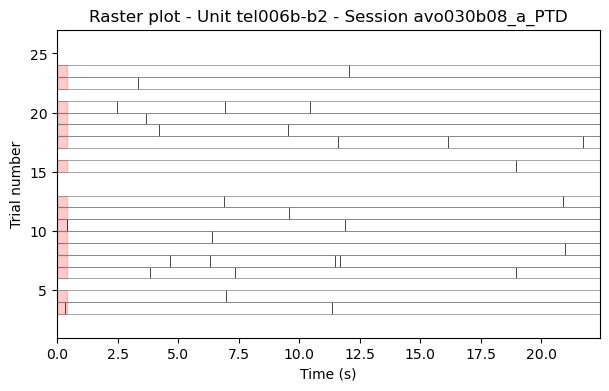

  Session: avo030b09_p_PTD
    Pre-stimulus spikes: 0
    Pre-stimulus duration (total): 10.800000000000004


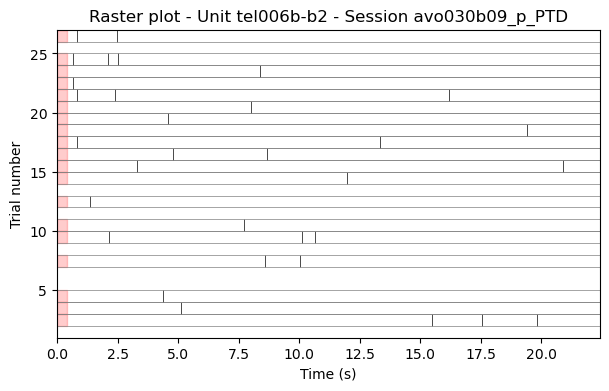

  Session: avo030b07_p_PTD
    Pre-stimulus spikes: 0
    Pre-stimulus duration (total): 6.400000000000001


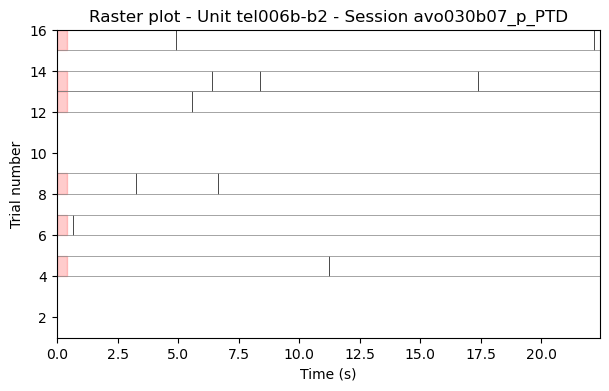

In [19]:
# Raster plot to check pre-stimulus firing rates

unit_id = "tel006b-b2"
sessions = list(spikes[unit].keys())
for session in sessions:
    print(f"  Session: {session}")
    session_trials_idx = spikes[unit][session][0]
    session_spikes = spikes[unit][session][1]
    session_trials_info = trials[trials["Session"] == session]
    session_events_info = events[events["Session"] == session]
    prestim_spikes_counts, prestim_duration_total = collect_prestim_spikes(unit, session, spikes, trials, events)
    print(f"    Pre-stimulus spikes: {prestim_spikes_counts}")
    print(f"    Pre-stimulus duration (total): {prestim_duration_total}")

    # Plot raster of each trial one above the other
    n_trials = len(np.unique(session_trials_idx))
    trial_durations = session_trials_info["Duration"].values
    t_max = np.max(trial_durations)
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.set_title(f"Raster plot - Unit {unit_id} - Session {session}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Trial number")
    ax.set_xlim(0, t_max)
    ax.set_ylim(1, n_trials)
    for trial in np.unique(session_trials_idx):
        trial_spikes = session_spikes[session_trials_idx == trial]
        trial_events = session_events_info[session_events_info["TrialNum"] == trial]
        trial_duration = session_trials_info[session_trials_info["TrialNum"] == trial]["Duration"].values[0]
        prestim_duration = session_events_info[session_events_info["TrialNum"] == trial]["DPre"].values[0] # first prestimulus in trial to simplify
        # plot raster of each trial
        ax.vlines(trial_spikes, trial, trial + 1, color="black", linewidth=0.5)
        # delimit trials
        ax.hlines(trial, 0, t_max, color="gray", linewidth=0.5)
        ax.hlines(trial + 1, 0, t_max, color="gray", linewidth=0.5)
        # highlight pre-stimulus period
        ax.fill_betweenx([trial, trial + 1], 0, prestim_duration, color="red", alpha=0.2)
    plt.show()


## Generate Surrogate Data

The goal is to assess the probability to decode conditions active/passive when a single active
session is available, assuming there is only noise variability between sessions (no signal).

**Assumptions**:
- Each unit fires according to a Poisson process with a random firing rate, drawn in each recording
  independently.
- Four recordings are simulated, representing each condition: PTD passive, PTD active, CLK passive,
  CLK active.
- In each recording, the firing rate of the unit is determined from the mean and std of the unit
  firing rate in the original data across sessions, estimated in the pre-stimulus periods.
- For each recording, `n_trials` trials are simulated, each with a duration of `T` seconds. To be
  homogenous across units and sessions: `n_trials = 30` and `T = 0.25` seconds.

For this assessment, the selected units are those from Elguelda, in the PFC. This way, only trained
units are retained, in the most favorable condition where the spike sorting algorithm was more
reliable. 

### Estimate differences between sessions

In [20]:
stats_sessions = {}
for unit in units:
    all_rates = np.array([prestim_rates[unit][session] for session in prestim_rates[unit].keys()])
    mean = np.mean(all_rates)
    std = np.std(all_rates)
    stats_sessions[unit] = {"mean": mean, "std": std}

### Simulate data

In [21]:
# Select units from Elguelda PFC
sites_PFC = sites_elguelda["PFC"]
units_PFC = []
for unit in units:
    for site in sites_PFC:
        if unit.startswith(site):
            units_PFC.append(unit)
            break
print(f"Number of units in PFC: {len(units_PFC)}")

Number of units in PFC: 223


In [23]:
# Simulate data

n_sim = 100
n_trials = 30
T = 0.25
conditions = ["PTD-a", "PTD-p", "CLK-a", "CLK-p"]
n_conditions = len(conditions)
n_units = len(units_PFC)

sim_data = np.zeros((n_units, n_conditions, n_trials, n_sim))
print(f"Shape of simulated data: {sim_data.shape}")
print("(n_units, n_conditions, n_trials, n_simulations)")

for sim in range(n_sim):
    for u, unit in enumerate(units_PFC):
        mean = stats_sessions[unit]["mean"]
        std = stats_sessions[unit]["std"]
        for c, cond in enumerate(conditions):
            # Draw a fixed rate for each condition
            r = np.abs(np.random.normal(mean, std)) # positive rate
            # Simulate a Poisson process on each trial
            counts = np.random.poisson(r * T, n_trials)
            sim_data[u, c, :, sim] = counts

Shape of simulated data: (223, 4, 30, 100)
(n_units, n_conditions, n_trials, n_simulations)


In [24]:
# Save and load simulated data
path_sim_data = Path(os.path.join(current_path, "sim_data.pkl"))
save = True
if save:
    with open(path_sim_data, "wb") as file:
        dill.dump(sim_data, file)
    print(f"Saved simulated data at: {path_sim_data}")
else:
    with open(path_sim_data, "rb") as file:
        sim_data = dill.load(file)
    print(f"Loaded simulated data at: {path_sim_data}")
    print(f"Type of simulated data: {type(sim_data)}")

Saved simulated data at: /Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/notebooks/tests/sim_data.pkl


### Train Decoders

In [25]:
# Train decoders for active-passive in each task (PTD, CLK), to test across tasks

classifications = {"trainPTD": {"train": ["PTD-a", "PTD-p"], "test": ["CLK-a", "CLK-p"]},
                  "trainCLK": {"train": ["CLK-a", "CLK-p"], "test": ["PTD-a", "PTD-p"]}}
n_perm = 100

classifiers = {}

for name, classif in classifications.items():
    classifiers[name] = {"true": np.zeros((n_units, n_sim)), "null": np.zeros((n_units, n_perm, n_sim))}
    train_conditions = classif["train"]
    test_conditions = classif["test"]
    # Train classifier
    class_0_idx = conditions.index(train_conditions[0])
    class_1_idx = conditions.index(train_conditions[1])
    for sim in range(n_sim):
        class_0_data = sim_data[:, class_0_idx, :, sim] # shape (n_units, n_trials)
        class_1_data = sim_data[:, class_1_idx, :, sim]
        # True model: Compute the mean across trials for each condition (population vector)
        mean_0 = np.mean(class_0_data, axis=1)
        mean_1 = np.mean(class_1_data, axis=1)
        w_true = mean_1 - mean_0
        classifiers[name]['true'][:, sim] = w_true
        # Null models:
        for perm in range(n_perm):
            # Concatenate true data to shuffle trials across conditions per unit for this simulation
            combined_trials = np.concatenate([class_0_data, class_1_data], axis=1)  # shape (n_units, 2*n_trials)
            # Shuffle trials across conditions
            permuted_indices = np.random.permutation(combined_trials.shape[1])
            permuted_trials = combined_trials[:, permuted_indices]
            # Split permuted trials back into the two original conditions
            permuted_class_0 = permuted_trials[:, :n_trials]  # first n_trials in class 0
            permuted_class_1 = permuted_trials[:, n_trials:]  # remaining trials in class 1
            # Compute the mean across trials for each condition (population vector)
            mean_0 = np.mean(permuted_class_0, axis=1)
            mean_1 = np.mean(permuted_class_1, axis=1)
            w_null = mean_1 - mean_0
            classifiers[name]['null'][:, perm, sim] = w_null

In [26]:
# Save and load classifiers
path_classifiers = Path(os.path.join(current_path, "classifiers.pkl"))
save = True
if save:
    with open(path_classifiers, "wb") as file:
        dill.dump(classifiers, file)
    print(f"Saved classifiers data at: {path_classifiers}")
else:
    with open(path_classifiers, "rb") as file:
        classifiers = dill.load(file)
    print(f"Loaded classifiers data at: {path_classifiers}")
    print(f"Type of classifiers data: {type(classifiers)}")

Saved classifiers data at: /Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/notebooks/tests/classifiers.pkl


### Test Decoders

In [27]:
# Assess d' of train and test data projected onto the classifiers

def compute_dprime(projections_class0, projections_class1):
    mu0 = np.mean(projections_class0)
    mu1 = np.mean(projections_class1)
    var0 = np.var(projections_class0, ddof=1)
    var1 = np.var(projections_class1, ddof=1)
    return (mu1 - mu0) / np.sqrt(0.5 * (var0 + var1))

compute = True
if compute:
    # Data structures to store d' values
    dprimes = {name: {"true": np.zeros(n_sim), "null": np.zeros((n_perm, n_sim))} for name in classifications}

    for name, classif in classifications.items():
        test_conds = classif["test"]
        class_0_idx = conditions.index(test_conds[0])
        class_1_idx = conditions.index(test_conds[1])

        for sim in range(n_sim):
            # True model data (original, unpermuted)
            class_0_data = sim_data[:, class_0_idx, :, sim]  # (n_units, n_trials)
            class_1_data = sim_data[:, class_1_idx, :, sim]  # (n_units, n_trials)
            w_true = classifiers[name]['true'][:, sim]       # (n_units,)

            # Project true data onto true classifier (population-level)
            proj_true_0 = w_true @ class_0_data  # (n_trials,)
            proj_true_1 = w_true @ class_1_data  # (n_trials,)
            dprimes[name]["true"][sim] = compute_dprime(proj_true_0, proj_true_1)

            # Null models
            for perm in range(n_perm):
                w_null = classifiers[name]['null'][:, perm, sim]  # (n_units,)
                proj_null_0 = w_null @ class_0_data  # (n_trials,)
                proj_null_1 = w_null @ class_1_data  # (n_trials,)
                dprimes[name]["null"][perm, sim] = compute_dprime(proj_null_0, proj_null_1)


In [28]:
# Save and load d' data
path_dprimes = Path(os.path.join(current_path, "dprimes.pkl"))

save = True
if save:
    with open(path_dprimes, "wb") as file:
        dill.dump(dprimes, file)
    print(f"Saved d' data at: {path_dprimes}")
else:
    with open(path_dprimes, "rb") as file:
        dprimes = dill.load(file)
    print(f"Loaded d' data at: {path_dprimes}")
    print(f"Type of d' data: {type(dprimes)}")
    print(f"Keys in d' data: {dprimes.keys()}")

Saved d' data at: /Users/eresther/Documents/work/projects/multitask-context-dependent-behavior/notebooks/tests/dprimes.pkl


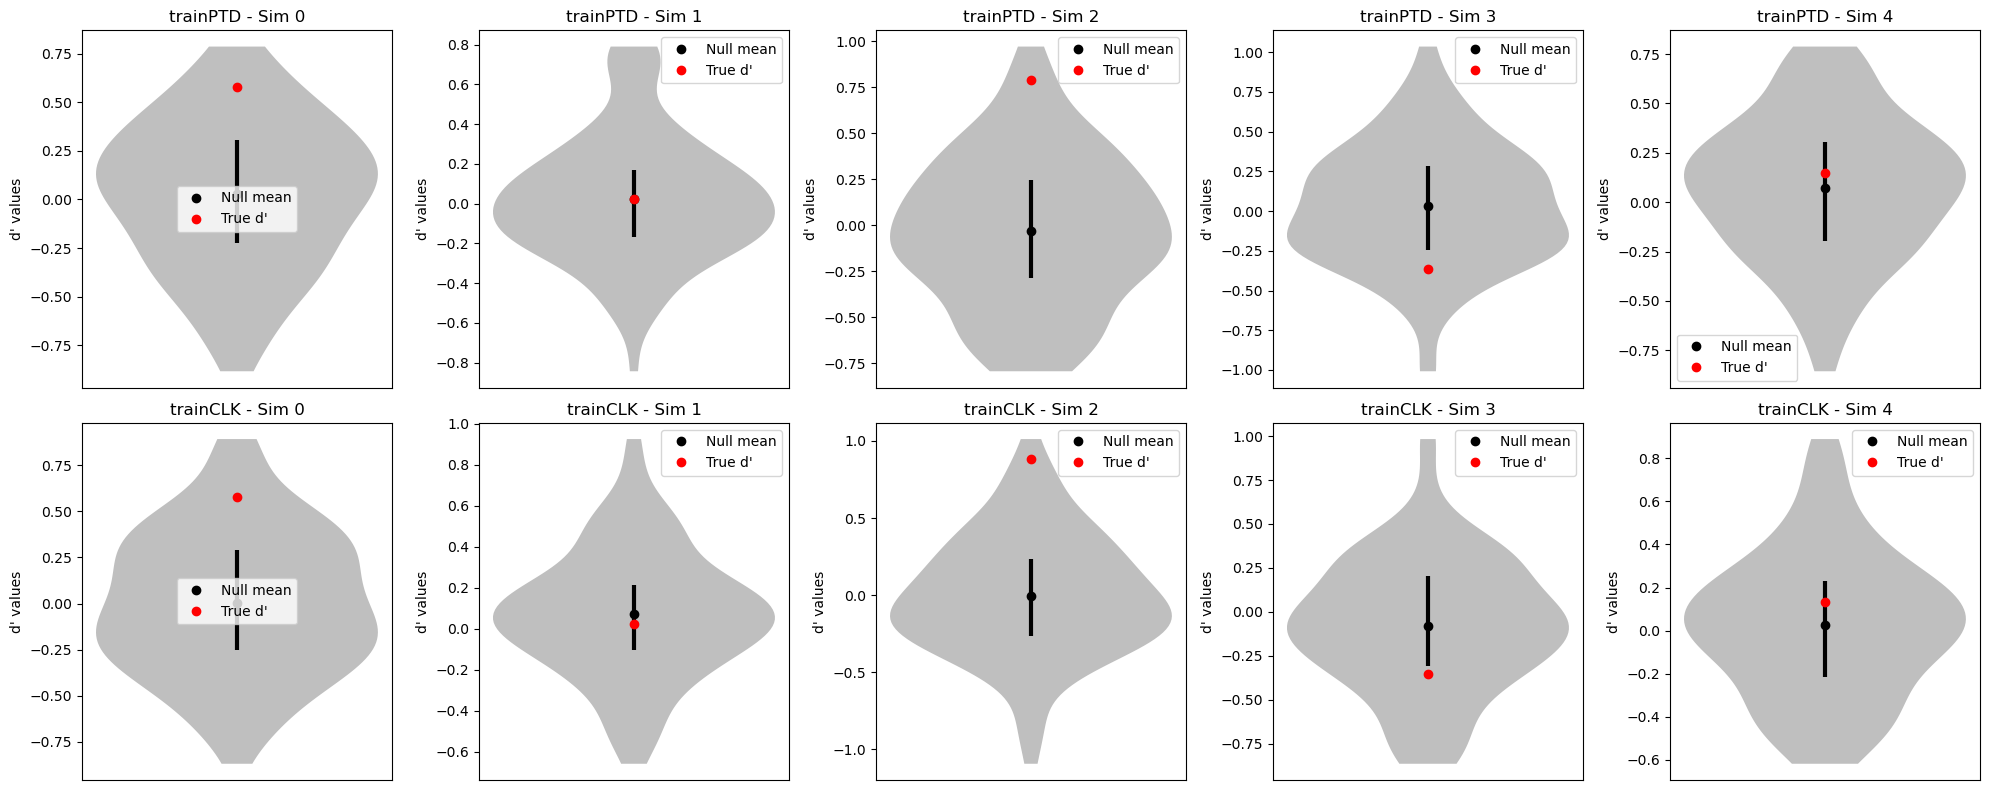

In [30]:

def plot_dprime_null_true(dprimes, sim_indices=None):
    n_classifiers = len(dprimes)
    classifier_names = list(dprimes.keys())
    n_sim = dprimes[classifier_names[0]]['true'].shape[0]
    if sim_indices is None:
        sim_indices = range(n_sim)

    fig, axes = plt.subplots(n_classifiers, len(sim_indices), figsize=(4*len(sim_indices), 4*n_classifiers), squeeze=False)

    for row_idx, name in enumerate(classifier_names):
        for col_idx, sim in enumerate(sim_indices):
            ax = axes[row_idx, col_idx]
            null_vals = dprimes[name]['null'][:, sim]
            true_val = dprimes[name]['true'][sim]

            # Violin plot for null distribution
            parts = ax.violinplot(null_vals, showmeans=False, showmedians=False, showextrema=False)
            for pc in parts['bodies']:
                pc.set_facecolor('gray')
                pc.set_alpha(0.5)

            # Null mean as black dot
            mean_null = np.mean(null_vals)
            ax.plot(1, mean_null, 'o', color='black', label='Null mean')

            # 25th and 75th quantiles as moustaches
            q25, q75 = np.percentile(null_vals, [25, 75])
            ax.vlines(1, q25, q75, color='black', linewidth=3)

            # True d' as red dot
            ax.plot(1, true_val, 'o', color='red', label="True d'")

            ax.set_title(f'{name} - Sim {sim}')
            ax.set_xticks([])
            ax.set_ylabel("d' values")
            ax.legend()

    plt.tight_layout()
    plt.show()

# Example: plot for the first 5 simulations
plot_dprime_null_true(dprimes, sim_indices=range(5))

### Compute p-value

In [31]:
# Compute p-values using a two-tailed test
p_values = {name: np.zeros(n_sim) for name in classifications}

for name in classifications:
    for sim in range(n_sim):
        true_d = dprimes[name]["true"][sim]
        null_ds = dprimes[name]["null"][:, sim]

        # Two-tailed test (significant deviation in either direction)
        if true_d >= 0:
            # For positive true d', count null values more extreme in positive direction
            p_val = (np.sum(null_ds >= true_d) + 1) / (n_perm + 1)
        else:
            # For negative true d', count null values more extreme in negative direction
            p_val = (np.sum(null_ds <= true_d) + 1) / (n_perm + 1)

        p_values[name][sim] = p_val


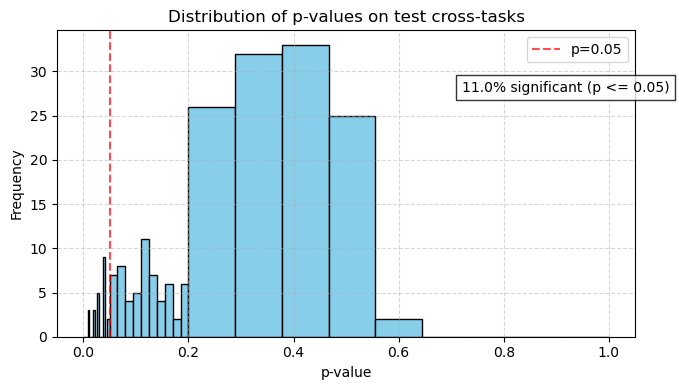

In [32]:
# Merge p-values from both classifiers
all_pvalues = np.concatenate([p_values['trainPTD'], p_values['trainCLK']])

# Define non-uniform bins with higher resolution at lower p-values
bins = np.concatenate([
    np.linspace(0, 0.01, 20, endpoint=False),  # very fine bins from 0 to 0.01
    np.linspace(0.01, 0.05, 10, endpoint=False),  # fine bins from 0.01 to 0.05
    np.linspace(0.05, 0.2, 10, endpoint=False),   # medium bins from 0.05 to 0.2
    np.linspace(0.2, 1.0, 10)                    # wider bins from 0.2 to 1
])

plt.figure(figsize=(7, 4))
plt.hist(all_pvalues, bins=bins, color='skyblue', edgecolor='black')
plt.title('Distribution of p-values on test cross-tasks')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)

# Add vertical line at p=0.05 for reference
plt.axvline(x=0.05, color='red', linestyle='--', alpha=0.7, label='p=0.05')

# Calculate and display percentage of significant results (p <= 0.05)
sig_percentage = (all_pvalues <= 0.05).mean() * 100
plt.text(0.7, 0.8, f'{sig_percentage:.1f}% significant (p <= 0.05)',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.legend()
plt.tight_layout()
plt.show()


# Misc

In [11]:
unit_id = "was003a-b1"
session_id = "was003a05_p_PTD"

ds = RawSpkTimes(unit_id, session_id)

assert ds.unit_id == unit_id
assert ds.session_id == session_id

print(ds.path_ruler())
print(f"Path to data (no ext): {ds.path}")
print(ds.loader(ds.path))

# Load Data
ds.load()
print(f"Data Structure Shape: {ds.shape}")

print('')
print(ds.data)
print(ds.block)
n = ds.n_blocks
print(ds.n_blocks)


<RawSpkTimesPath> - ROOT: /Users/eresther/Documents/Work/multitask-context-dependent-behavior/data
Path to data (no ext): /Users/eresther/Documents/Work/multitask-context-dependent-behavior/data/raw/was003a-b1/was003a05_p_PTD
<LoaderNPY> - ndarray - Path: /Users/eresther/Documents/Work/multitask-context-dependent-behavior/data/raw/was003a-b1/was003a05_p_PTD
Load: /Users/eresther/Documents/Work/multitask-context-dependent-behavior/data/raw/was003a-b1/was003a05_p_PTD.npy
RAW (2, 1365)
Data Structure Shape: (1365,)

[0.25676 0.4662  0.47848 ... 5.5716  6.3774  7.00356]
<CoordBlock>: 1365 samples, 1: 51, 2: 16, 3: 8, 4: 29, 5: 4, 6: 52, 7: 53, 8: 24, 9: 60, 10: 64, 11: 49, 12: 25, 13: 20, 14: 38, 15: 23, 16: 34, 17: 8, 18: 26, 19: 35, 20: 9, 21: 59, 22: 18, 23: 65, 24: 8, 25: 45, 26: 52, 27: 83, 28: 18, 29: 11, 30: 58, 31: 23, 32: 41, 33: 33, 34: 5, 35: 48, 36: 13, 37: 55, 38: 76, 39: 26.
39


In [10]:
# Load numpy data manually

path_to_npy = "/Users/eresther/Documents/Work/multitask-context-dependent-behavior/data/raw/was003a-b1/was003a05_p_PTD.npy"

data = np.load(path_to_npy, allow_pickle=True)
print(data.shape)

(2, 1365)
